In [12]:
import matplotlib.pyplot as plt
import pandas as pd

#loading the file with only defined consortia cases
df = pd.read_csv("defined_articles.csv")

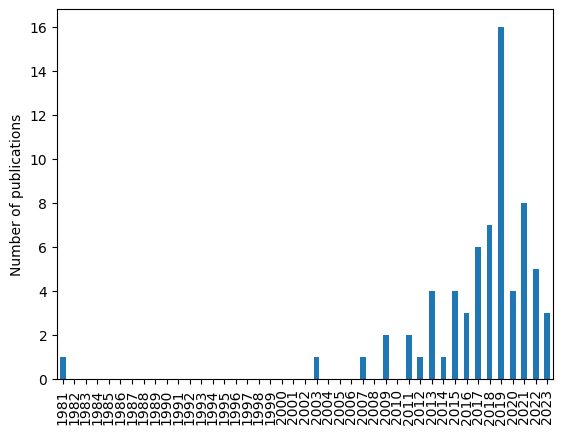

In [4]:
#Bar graph showing publications per year

#add in the years without any publications
publications_per_year = df.groupby("Year").size()
all_years = pd.Series(0, index=range(1981,2023))
publications_per_year = publications_per_year.add(all_years, fill_value=0)

#make plot
publications_per_year.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

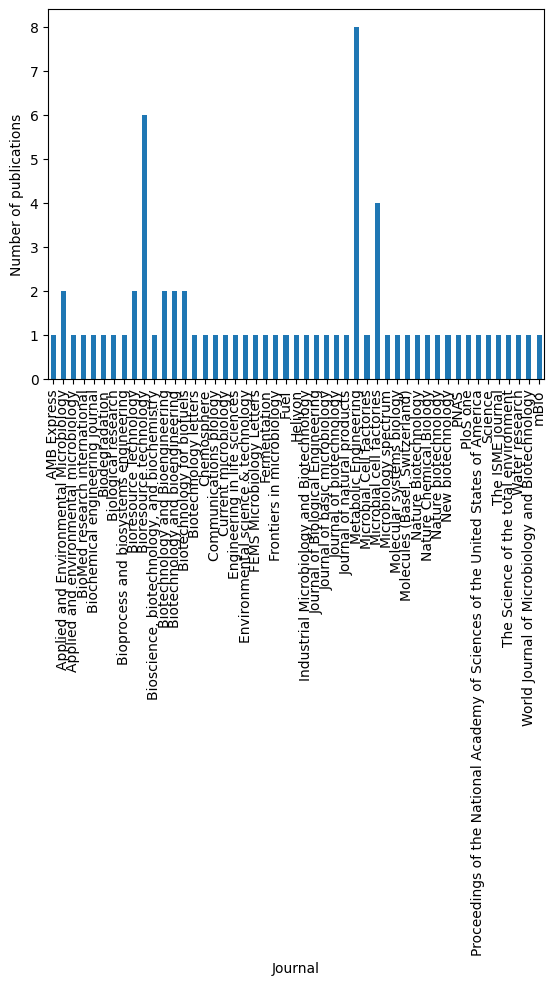

In [5]:
#Plot showing publications by journal
publications_per_journal = df.groupby("Journal").size()

#make the plot
publications_per_journal.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

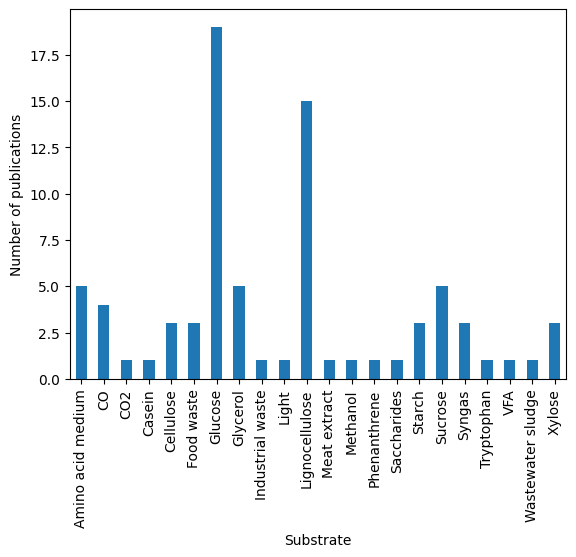

In [13]:
#Plot showing substrate

s_df = df.copy()

s_df["Substrate"] = s_df["Substrate"].str.split(", ")

# Use the explode function to create a new row for each substrate
s_df = s_df.explode("Substrate")

#group
substrate_per_journal = s_df.groupby("Substrate").size()

#make the plot
substrate_per_journal.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

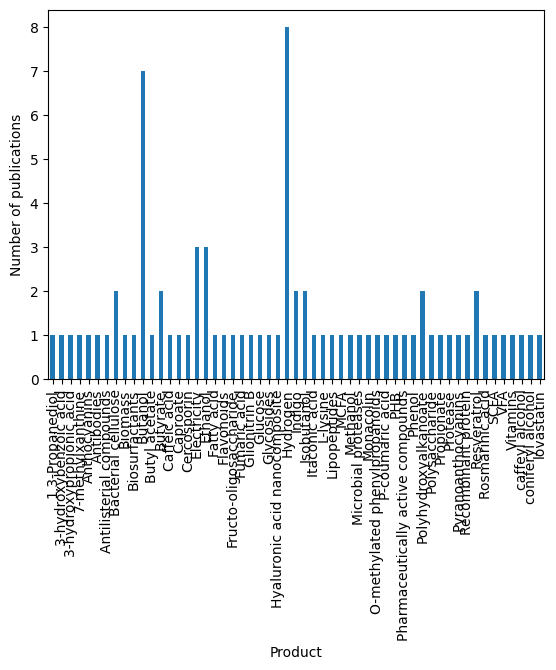

In [14]:
#Plot showing product

p_df = df.copy()

p_df["Product"] = p_df["Product"].str.split(", ")

# Use the explode function to create a new row for each animal
p_df = p_df.explode("Product")

#group
product_per_journal = p_df.groupby("Product").size()

#make the plot
product_per_journal.plot.bar()
plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

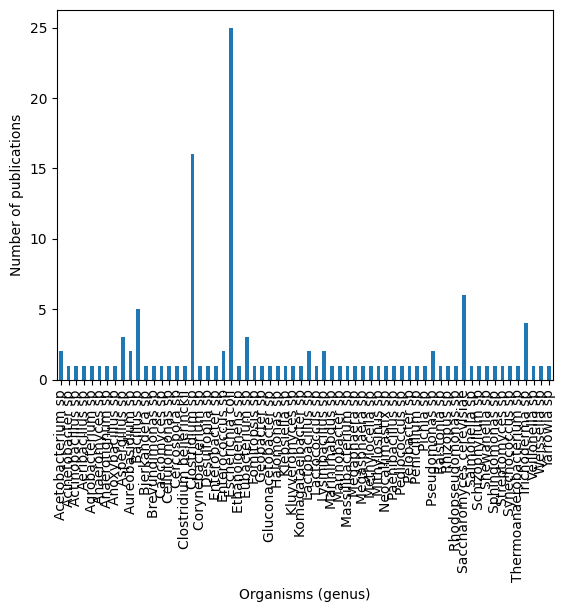

In [10]:
#Plot showing organisms (model organisms and genus only)

o_df = df.copy()

o_df["Organisms (genus)"] = o_df["Organisms (genus)"].str.split(", ")

# Use the explode function to create a new row for each animal
o_df = o_df.explode("Organisms (genus)")

#group
organism_per_journal = o_df.groupby("Organisms (genus)").size()

#make the plot
organism_per_journal.plot.bar()
plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

In [20]:
import networkx as nx

df = pd.read_csv("defined_articles.csv")

In [46]:
#creating a bipartite network for organisms and compounds

#read data from file and crate datastructures in lists
compound_nodes = []
organism_nodes = []
edges = []

#iterate over the rows of the dataframe
for index, row in df.iterrows():

    #get lists of substrates, products, and organisms
    substrates = row["Substrate"].split(", ")
    products = row["Product"].split(", ")
    organisms = row["Organisms"].split(", ")

    for substrate in substrates:
        compound_nodes.append(substrate)

        for organism in organisms:
            organism_nodes.append(organism)
            #add edge from the substrate to the organism
            edges.append((substrate, organism))
            
            for product in products:
                compound_nodes.append(product)
                #add edge from the organism to the product
                edges.append((organism, product))

#build network
bipartiteNetwork = nx.DiGraph()

for node in compound_nodes:
    s = 5 + compound_nodes.count(node)
    bipartiteNetwork.add_node(node, bipartite = 0, color = "red", size = s)

for node in organism_nodes:
    s = 5 + organism_nodes.count(node)
    bipartiteNetwork.add_node(node, bipartite = 1, shape = 'square', size = s)

bipartiteNetwork.add_edges_from(edges)

#visualise network

from pyvis.network import Network

nt = Network('1000px', '1800px', directed=True)
nt.from_nx(bipartiteNetwork)
nt.show('bipartite_organisms_comounds.html')

In [48]:
#creating a bipartite network for organisms and compounds using the genus of the organisms

#read data from file and crate datastructures in dictionaries

compound_nodes = []
organism_nodes = []
edges = []

#iterate over the rows of the dataframe
for index, row in df.iterrows():

    #get lists of substrates, products, and organisms
    substrates = row["Substrate"].split(", ")
    products = row["Product"].split(", ")
    organisms = row["Organisms (genus)"].split(", ")

    for substrate in substrates:
        compound_nodes.append(substrate)

        for organism in organisms:
            organism_nodes.append(organism)
            #add edge from the substrate to the organism
            edges.append((substrate, organism))
            
            for product in products:
                compound_nodes.append(product)
                #add edge from the organism to the product
                edges.append((organism, product))

#build network
bipartiteNetwork = nx.DiGraph()

for node in compound_nodes:
    s = 5 + compound_nodes.count(node)
    bipartiteNetwork.add_node(node, bipartite = 0, color = "red", size = s)

for node in organism_nodes:
    s = 5 + organism_nodes.count(node)
    bipartiteNetwork.add_node(node, bipartite = 1, shape = 'square', size = s)

bipartiteNetwork.add_edges_from(edges)

#visualise network

from pyvis.network import Network

nt = Network('1000px', '1800px', directed=True)
nt.from_nx(bipartiteNetwork)
nt.show('bipartite_organisms_genus_comounds.html')